In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline
import tools
from sklearn.cluster import KMeans 
import itertools
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm


# Curse of Dimensionality

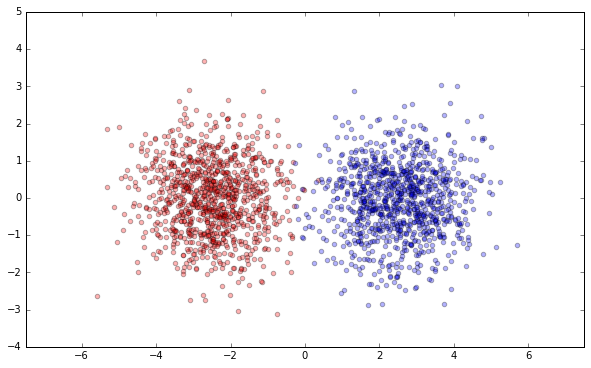

In [2]:
count = 1000
sep = 5.

plt.figure(figsize=(16,9))
x = np.zeros((2, 2*count))
x[0,:] = np.concatenate((scs.norm(-sep/2., 1).rvs(count), (scs.norm(sep/2., 1).rvs(count))))
x[1, :] = scs.norm(0, 1).rvs(2*count)
plt.figure(figsize=(10,6))
plt.axis('equal')
plt.scatter(x[0, :count], x[1, :count], c='r', alpha=0.3)
plt.scatter(x[0, count:], x[1, count:], c='b', alpha=0.3)
plt.show()

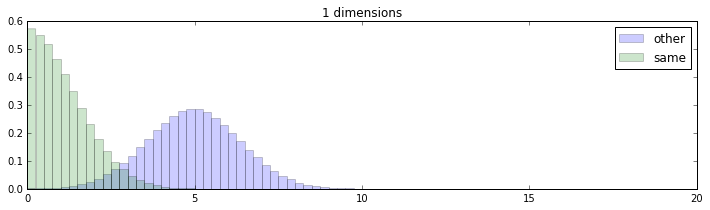

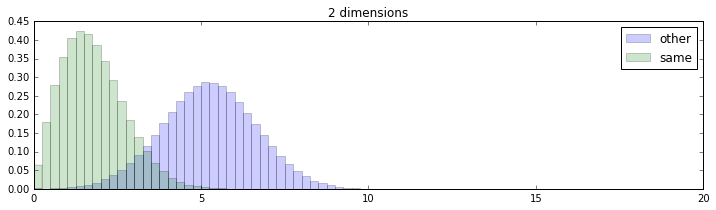

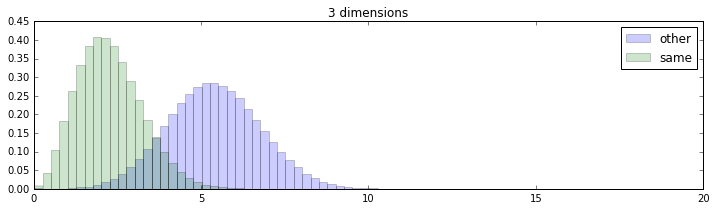

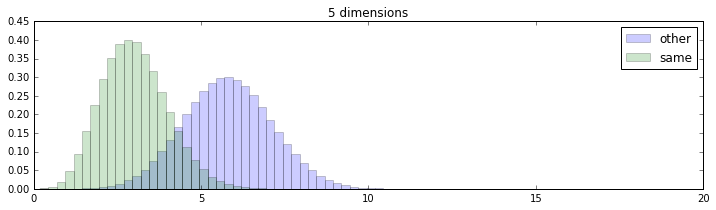

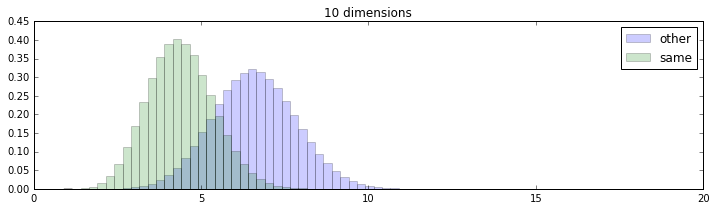

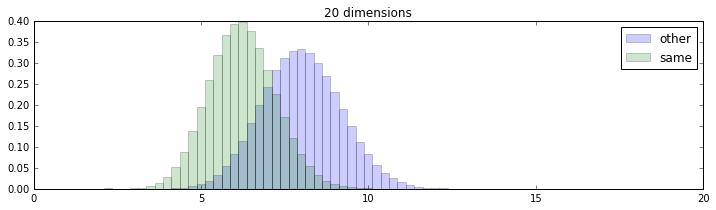

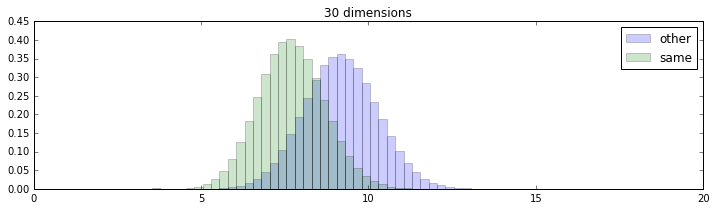

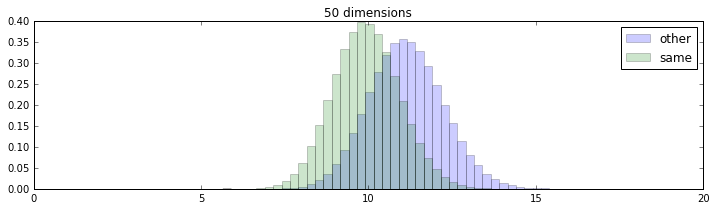

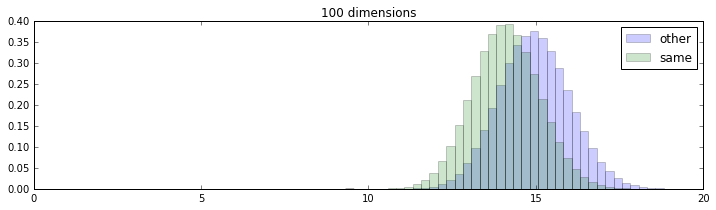

In [3]:
for dims in [1, 2, 3, 5, 10, 20, 30, 50, 100]:
    x = np.zeros((dims, 2*count))
    x[0,:] = np.concatenate((scs.norm(-sep/2., 1).rvs(count), (scs.norm(sep/2., 1).rvs(count))))
    for d in range(1, dims):
        x[d, :] = scs.norm(0, 1).rvs(2*count)

    clusterlabels = ["cluster 1"] * count + ["cluster 2"] * count 
    #if dims == 1:
    #    tools.histpair(np.array(x[0,:]), np.array(clusterlabels), binsize=0.5, figsize=(12,2),
    #               xmin=-10, xmax=10)

    
    y = []
    dist = []
    for i in range(2*count):
        for j in range(i+1, 2*count):
            d = np.sqrt(sum((x[:,i] - x[:, j])**2))
            dist.append(d)
            y.append("same" if i // count == j // count else "other")
    tools.histpair(np.array(dist), np.array(y), binsize=0.25, figsize=(12,3),
                   xmin=0, xmax=20, title="{0} dimensions".format(dims))
    #plt.axes(frameon=False)

    plt.show()
    

# Cluster pictures

In [274]:
#clusters = [(-2, -3, .075, 100), (-5, -5, .075, 75), (4, 3, .15, 200), (1, -3, .05, 150), (-1, 0.15, 0.075, 100)]
clusters = [(-2, -3, .75, 100), (-5, -5, .75, 75), (4, 3, 1.5, 200), (1, -3, .5, 150), (-1, 0.15, 0.75, 100)]

#clusters = [(-2, -3, 1, 100), (-5, -5, 1, 75), (4, 3, 1.5, 200), (1, -3, 0.75, 150), (-1, 0.5, 1, 100)]

k = len(clusters)
n = sum([c[3] for c in clusters])

x1 = np.array([])
x2 = np.array([])

for c in clusters:
    x1 = np.concatenate([x1, (scs.norm(c[0], c[2]).rvs(c[3]))])
    x2 = np.concatenate([x2, (scs.norm(c[1], c[2]).rvs(c[3]))])



In [275]:
km = KMeans(5)
y = km.fit_predict(np.stack((x1, x2)).T)
#plt.scatter(x1, x2, '.', alpha = 0.5, color=y)


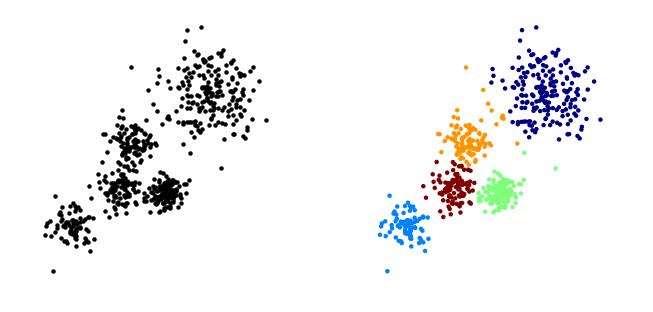

In [276]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.axis('off')
#plt.axis('equal')
plt.scatter(x1, x2, linewidths=0, color='k')
plt.ylim(ymin=-9, ymax=8)
plt.subplot(1,2,2)
plt.axis('off')
#plt.axis('equal')
plt.scatter(x1, x2, c=y, linewidths=0)
plt.ylim(ymin=-9, ymax=8)
#plt.show()
plt.savefig("images/clusters.png")

In [277]:
x1.shape, x2.shape, y.shape

((625,), (625,), (625,))

In [278]:
x.shape

(100, 2000)

In [279]:
pwd

u'/Users/jackbennetto/Documents/galvanize/dsr/lectures/probability'

In [280]:
x = np.stack((x1, x2)).T

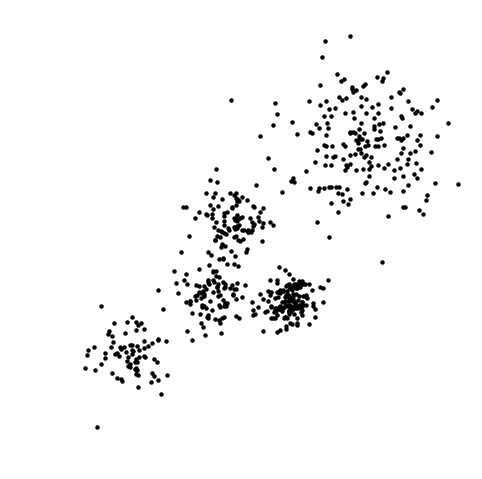

In [281]:
plt.figure(figsize=(8,8))
plt.axis('off')
#plt.axis('equal')
plt.scatter(x[:,0], x[:,1], linewidths=0, color='k')
plt.xlim(xmin=-9, xmax=8)
plt.ylim(ymin=-9, ymax=8)
plt.savefig("images/unsplitcluster.png")

k =  1 score = 6499103.44521
k =  2 score = 1074141.92159
k =  3 score = 232119.83982
k =  4 score = 163407.389435
k =  5 score = 87924.0252311
k =  6 score = 53020.0207553
k =  7 score = 32187.149287
k =  8 score = 29695.5114319
k =  9 score = 24990.0121633
k =  10 score = 19254.6373651
k =  11 score = 20517.5310666
k =  12 score = 14885.2776546


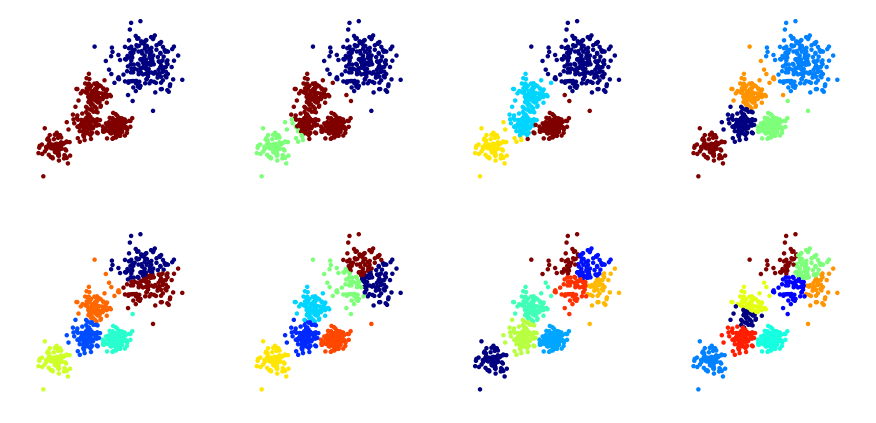

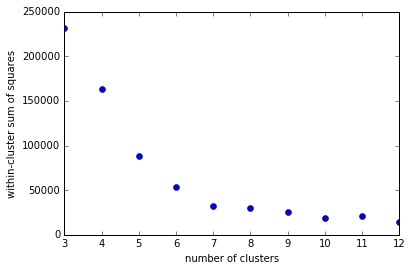

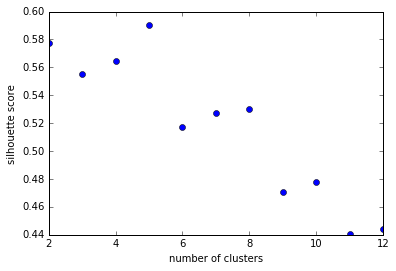

In [282]:
maxk = 13
wcss = np.zeros(maxk)
silhouette = np.zeros(maxk)

plt.figure(figsize=(15,7))
for k in xrange(1,maxk):
    km = KMeans(k)
    y = km.fit_predict(x)
    
    if k > 1 and k < 10:
        #plt.axis('equal')
        plt.subplot(2,4,k-1)
        plt.axis('off')
        plt.scatter(x[:,0], x[:,1], c=y, linewidths=0)
        plt.ylim(ymin=-9, ymax=8)
    
    
    for c in xrange(0, k):
        for i1, i2 in itertools.combinations([ i for i in xrange(len(y)) if y[i] == c ], 2):
            wcss[k] += sum(x[i1] - x[i2])**2
    wcss[k] /= 2
    
    print "k =  {0} score = {1}".format(k, wcss[k])
    
    if k > 1:
        silhouette[k] = silhouette_score(x,y)
    

plt.savefig("images/6clusters.png")
plt.show()

plt.plot(range(3,maxk), wcss[3:maxk], 'o')
plt.xlabel("number of clusters")
plt.ylabel("within-cluster sum of squares")
plt.savefig("images/elbow.png")
plt.show()


plt.plot(range(2,maxk), silhouette[2:maxk], 'o')
plt.xlabel("number of clusters")
plt.ylabel("silhouette score")
#plt.savefig("images/elbow.png")
plt.savefig("images/silhouettescores.png")
#plt.ylim(ymin=0.0, ymax=1.0)
plt.show()


# Silhouette Plots

('For n_clusters =', 2, 'The average silhouette_score is :', 0.57760021349698487)


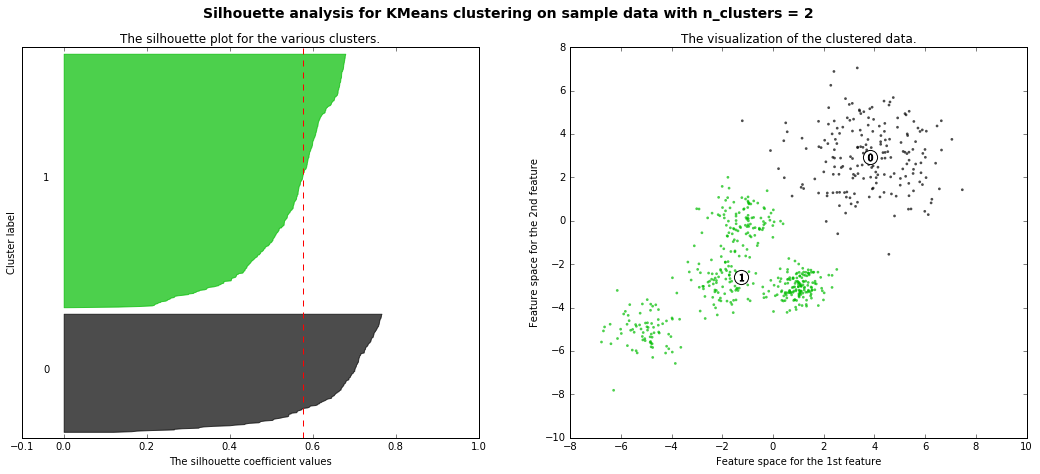

('For n_clusters =', 3, 'The average silhouette_score is :', 0.55524435927327775)


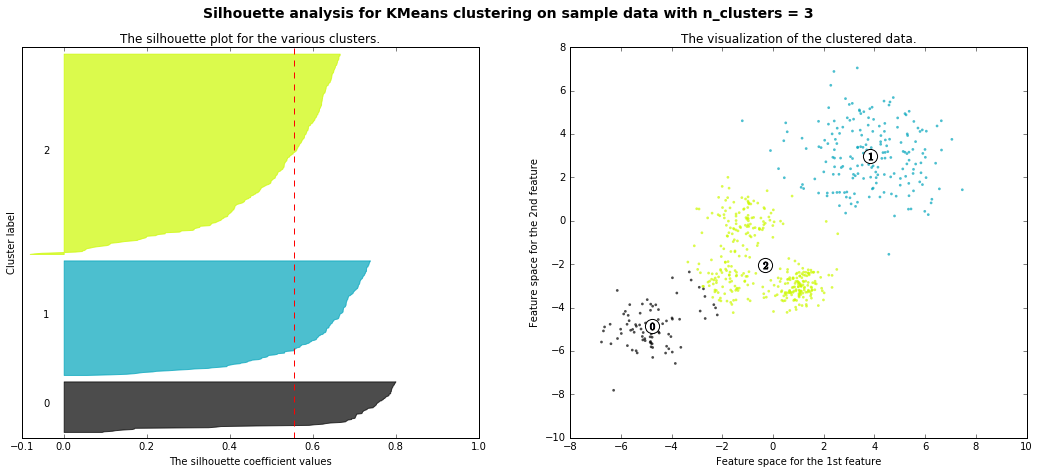

('For n_clusters =', 4, 'The average silhouette_score is :', 0.56418357947211761)


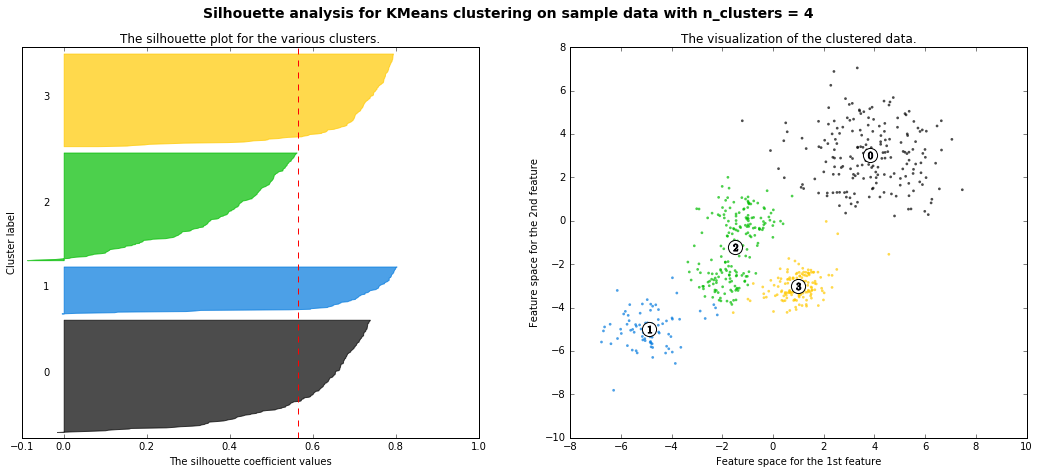

('For n_clusters =', 5, 'The average silhouette_score is :', 0.59004200221208625)


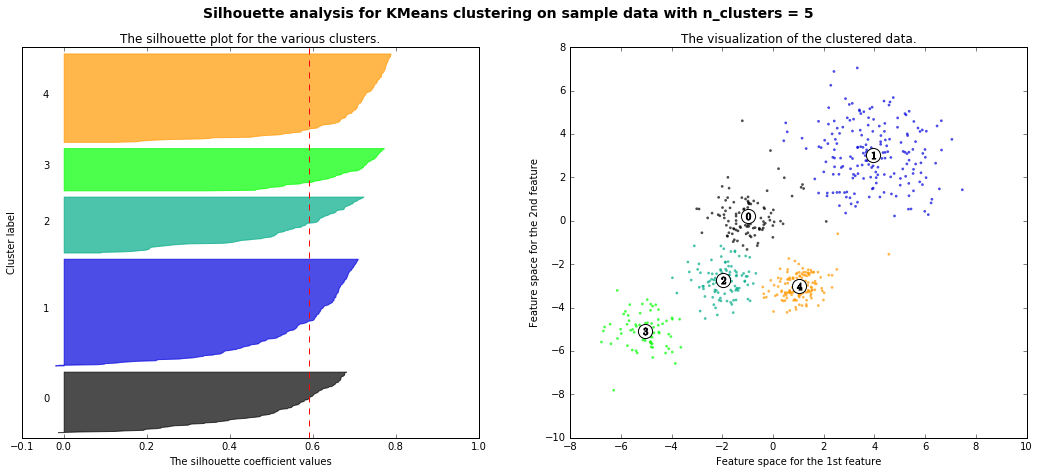

('For n_clusters =', 6, 'The average silhouette_score is :', 0.51708821979991582)


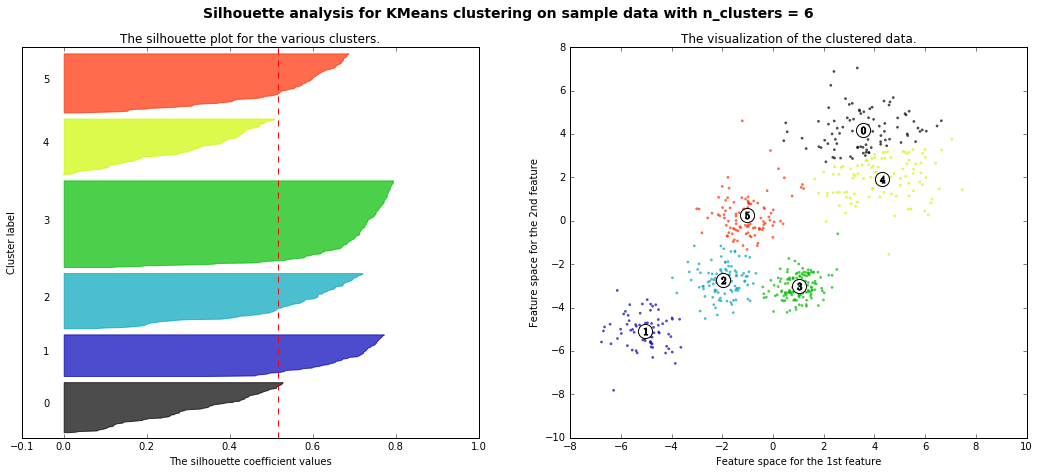

('For n_clusters =', 7, 'The average silhouette_score is :', 0.52813777145687202)


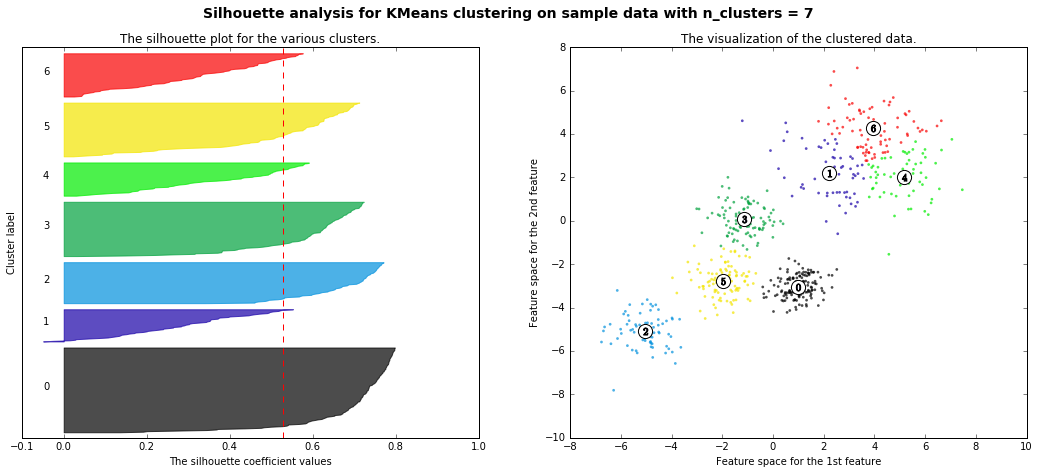

('For n_clusters =', 8, 'The average silhouette_score is :', 0.52517914278307176)


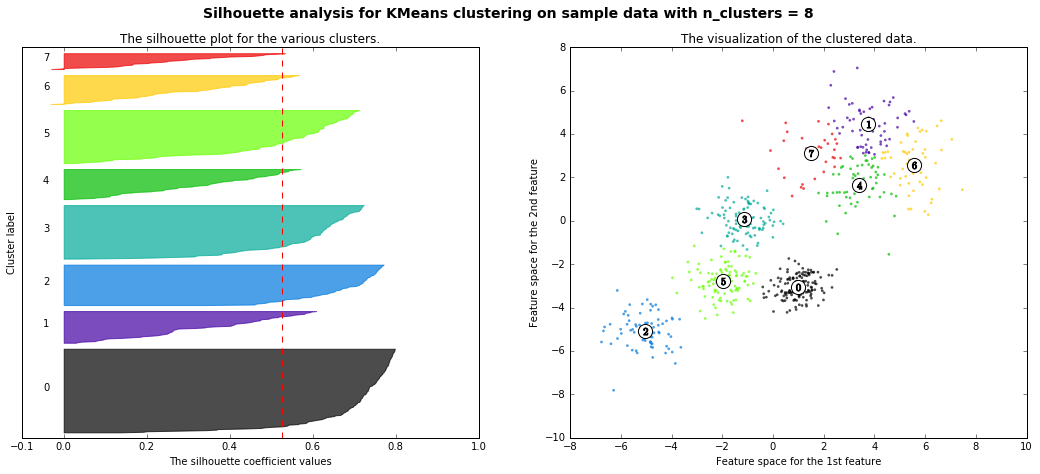

('For n_clusters =', 9, 'The average silhouette_score is :', 0.53165739443567395)


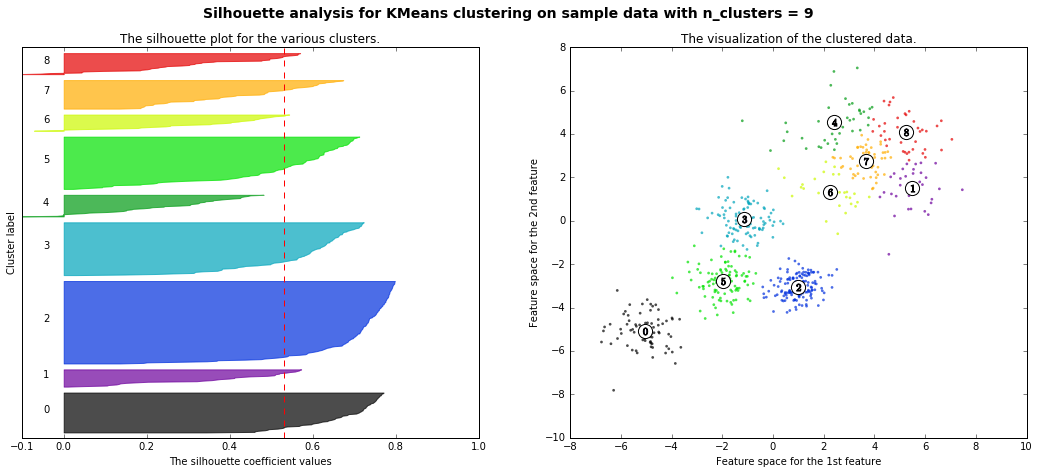

In [286]:
X = x
range_n_clusters = xrange(2,10)

# taken from sklearn
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Other clusters

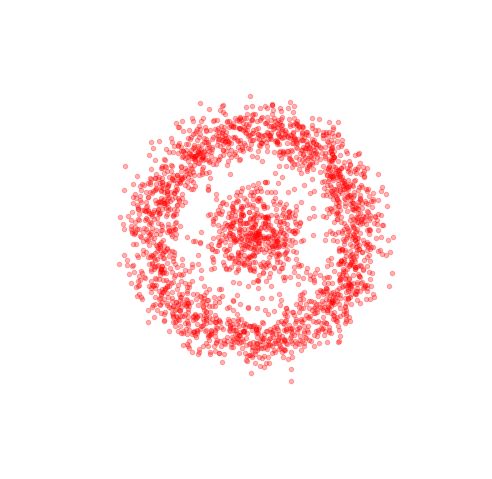

In [57]:
r1 = scs.norm(7,1).rvs(2000)
a1 = scs.uniform(0, 6.28).rvs(2000)
x1 = r1 * np.cos(a1)
y1 = r1 * np.sin(a1)

r2 = scs.norm(2,1).rvs(500)
a2 = scs.uniform(0, 6.28).rvs(500)
x2 = r2 * np.cos(a2)
y2 = r2 * np.sin(a2)
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.axis('off')

plt.scatter(x1, y1, color="r", alpha=0.3)
plt.scatter(x2, y2, color="r", alpha=0.3)
plt.savefig("images/bullseye.png")
